In [5]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


In [6]:
path = "Images"
annot = "Airplanes_Annotations"

airplane_588.jpg


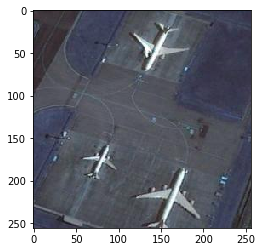

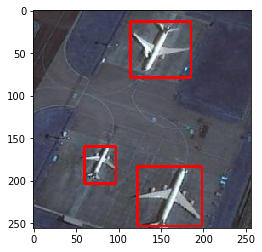

In [7]:
for e,i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [8]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

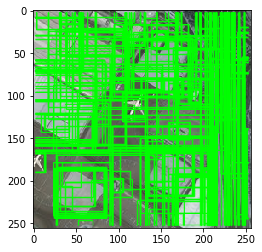

In [9]:
im = cv2.imread(os.path.join(path,"42850.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [10]:
train_images=[]
train_labels=[]

In [11]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [12]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [13]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 airplane_588.jpg
1 airplane_151.jpg
inside
3 airplane_359.jpg
4 airplane_430.jpg
5 airplane_505.jpg
7 airplane_146.jpg
8 airplane_108.jpg
inside
9 airplane_434.jpg
inside
10 airplane_461.jpg
11 airplane_329.jpg
12 airplane_132.jpg
13 airplane_268.jpg
14 airplane_450.jpg
15 airplane_617.jpg
16 airplane_501.jpg
17 airplane_352.jpg
18 airplane_150.jpg
19 airplane_287.jpg
20 airplane_155.jpg
21 airplane_302.jpg
22 airplane_030.jpg
23 airplane_593.jpg
inside
24 airplane_455.jpg
25 airplane_265.jpg
26 airplane_685.jpg
27 airplane_172.jpg
28 airplane_598.jpg
29 airplane_379.jpg
30 airplane_538.jpg
31 airplane_249.jpg
32 airplane_548.jpg
33 airplane_409.jpg
34 airplane_628.jpg
35 airplane_414.jpg
36 airplane_638.jpg
inside
37 airplane_170.jpg
38 airplane_291.jpg
inside
39 airplane_245.jpg
40 airplane_174.jpg
41 airplane_437.jpg
42 airplane_173.jpg
43 airplane_604.jpg
44 airplane_491.jpg
45 airplane_096.jpg
inside
46 airplane_417.jpg
47 airplane_054.jpg
48 airplane_534.jpg
49 airplane_674.jpg

395 airplane_556.jpg
396 airplane_263.jpg
397 airplane_044.jpg
398 airplane_682.jpg
399 airplane_111.jpg
400 airplane_412.jpg
401 airplane_009.jpg
402 airplane_432.jpg
403 airplane_625.jpg
404 airplane_220.jpg
405 airplane_114.jpg
406 airplane_578.jpg
407 airplane_275.jpg
408 airplane_300.jpg
409 airplane_097.jpg
inside
410 airplane_700.jpg
411 airplane_276.jpg
inside
412 airplane_681.jpg
413 airplane_243.jpg
414 airplane_589.jpg
415 airplane_269.jpg
416 airplane_394.jpg
417 airplane_676.jpg
418 airplane_393.jpg
419 airplane_313.jpg
420 airplane_303.jpg
421 airplane_011.jpg
422 airplane_522.jpg
423 airplane_623.jpg
424 airplane_686.jpg
425 airplane_260.jpg
426 airplane_239.jpg
427 airplane_002.jpg
428 airplane_194.jpg
429 airplane_003.jpg
430 airplane_332.jpg
inside
431 airplane_294.jpg
432 airplane_317.jpg
433 airplane_069.jpg
434 airplane_687.jpg
435 airplane_358.jpg
436 airplane_186.jpg
437 airplane_428.jpg
438 airplane_012.jpg
inside
439 airplane_116.jpg
443 airplane_374.jpg
444 ai

In [14]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [15]:
X_new.shape

(30229, 224, 224, 3)

In [16]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [17]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

553467904/553467096 [==============================] - 21s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_p

In [18]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [19]:
X= vggmodel.layers[-2].output

In [20]:
predictions = Dense(2, activation="softmax")(X)

In [21]:
model_final = Model(input = vggmodel.input, output = predictions)

/home/jie/anaconda/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [22]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

In [23]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [24]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [28]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [29]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)